**TP0**

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt, ceil

# Usada por los ítems a) y b). Genera un dataframe a partir de los parámetros
# recibidos
def generate_dataframe(d, n, C, center0, center1, diag):
  # Cantidad de puntos d-dimensionales a generar para la clase 0
  size0 = ceil(n / 2)
  # Cantidad de puntos d-dimensionales a generar para la clase 1
  size1 = n // 2

  # Genero los puntos de la clase 0
  class0 = np.random.multivariate_normal(center0, diag, size0)
  # Y luego los de la clase 1
  class1 = np.random.multivariate_normal(center1, diag, size1)

  # Concateno los puntos generados en un solo array
  data = np.concatenate((class0, class1))
  # Genero las columnas que van a representar las coordenadas de cada punto
  col = list(range(d))

  # Genero el dataframe
  df = pd.DataFrame(data, columns = col)

  # Genero la columna correspondiente a la clase a la que pertenece cada punto
  classes = [0] * size0 + [1] * size1
  # Y la agrego al dataframe
  df['Class'] = classes

  return df

Ítem a)

In [ ]:
# Ítem a)
def item_a(d, n, C):
  # Genero los centros para ambas clases
  center0 = [-1] * d
  center1 = [1] * d
  # Y la matriz de covarianza diagonal
  diag = np.diag([(C * sqrt(d)) ** 2] * d)

  # Genero y devuelvo el dataframe
  return generate_dataframe(d, n, C, center0, center1, diag)

Ítem b)

In [ ]:
# Ítem b)
def item_b(d, n, C):
  # Genero los centros para ambas clases
  center0 = [-1] + [0] * (d - 1)
  center1 = [1] + [0] * (d - 1)
  # Y la matriz de covarianza diagonal
  diag = np.diag([C ** 2] * d)

  # Genero y devuelvo el dataframe
  return generate_dataframe(d, n, C, center0, center1, diag)

Verificación ítems a) y b)

<Axes: xlabel='0', ylabel='1'>

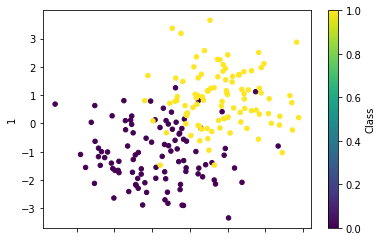

In [ ]:
import matplotlib.pyplot as plt

# Genero un dataframe para el ítem a), con d = 2, n = 200 y C = 0.75, y lo
# grafico
d = 2
n = 200
C = 0.75

df_a = item_a(d, n, C)
df_a.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis')

<Axes: xlabel='0', ylabel='1'>

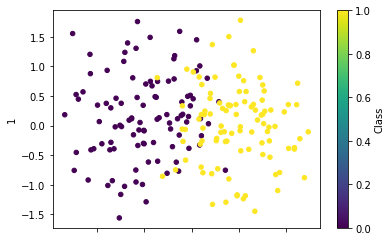

In [ ]:
# Ahora hago lo mismo para el ítem b)
df_b = item_b(d, n, C)
df_b.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis')

In [ ]:
# Genero un dataframe para el ítem a), con d = 4, n = 5000 y C = 2.0, y verifico
# que las medias y las desviaciones estándar son correctas
d = 4
n = 5000
C = 2.0

df_a = item_a(d, n, C)

# Agrupo los puntos por clase
group_a = df_a.groupby('Class')

# Calculo la media para el dataframe generado
print(group_a.mean())
# Y luego calculo la desviación estándar
print(group_a.std())

              0         1         2         3
Class                                        
0     -0.989850 -0.854953 -0.985030 -1.118048
1      0.901573  1.076966  0.876602  0.987794
              0         1         2         3
Class                                        
0      4.019614  4.064142  3.994310  3.923267
1      3.857765  3.925293  4.034995  3.990790


Analizando las salidas, se puede observar que las medias de la clase 0 se aproximan al centro (-1, -1, -1, -1), mientras que las medias de la clase 1 se aproximan al centro (1, 1, 1, 1).

Además, las desviaciones estándar de los datos generados se aproximan a 4, que es lo esperado.

In [ ]:
# Ahora hago lo mismo para el ítem b)
df_b = item_b(d, n, C)

# Agrupo los puntos por clase
group_b = df_b.groupby('Class')

# Calculo la media para el dataframe generado
print(group_b.mean())
# Y luego calculo la desviación estándar
print(group_b.std())

              0         1         2         3
Class                                        
0     -1.049269 -0.028712  0.005432  0.037034
1      0.999345 -0.018671  0.022371 -0.025487
              0         1         2         3
Class                                        
0      2.002676  1.975422  1.978600  2.030690
1      2.016503  2.012585  1.978786  1.992416


Analizando las salidas, se puede observar que las medias de la clase 0 se aproximan al centro (-1, 0, 0, 0), mientras que las medias de la clase 1 se aproximan al centro (1, 0, 0, 0).

Además, las desviaciones estándar de los datos generados se aproximan a 2, que es lo esperado.

Ítem c)

In [ ]:
from math import pi

# Convierte un punto en coordenadas cartesianas a coordenadas polares
def cartesian_to_polar(x, y):
  rho = sqrt(x ** 2 + y ** 2)
  theta = np.arctan2(y, x)

  return rho, theta

# Representa la primer curva utilizada para clasificar los puntos
def curve1(theta):
  return theta / (4 * pi)

# Representa la segunda curva utilizada para clasificar los puntos
def curve2(theta):
  return (theta + pi) / (4 * pi)

# Ítem c)
def item_c(n):
  # Cantidad de puntos a generar para la clase 0
  total0 = ceil(n / 2)
  # Cantidad de puntos a generar para la clase 1
  total1 = n // 2

  # Cantidad de puntos generados pertenecientes a la clase 0
  size0 = 0
  # Cantidad de puntos generados pertenecientes a la clase 1
  size1 = 0

  # Radio del círculo
  radius = 1

  # Puntos generados a partir de una distribución uniforme
  data = []

  # Itero hasta generar todos los puntos necesarios
  while (size0 < total0 or size1 < total1):
    # Genero un punto al azar con distribución uniforme
    x, y = np.random.uniform(-radius, radius, 2)

    # Calculo sus coordenadas polares
    rho, theta = cartesian_to_polar(x, y)

    # Verifico que esté dentro del círculo
    if rho <= radius:
      # Valor para verificar si el punto está entre las dos curvas
      curves = False

      # Recorro la espiral para comprobar si el punto se encuentra entre las
      # dos curvas
      for t in [theta + (2 * pi * i) for i in range(-1, 6)]:
        # Si el punto se encuentra entre las dos curvas, y faltan puntos en
        # la clase 0, lo agrego
        if curve1(t) < rho and rho < curve2(t):
          if size0 < total0:    
            data += [(x, y, 0)]
            size0 += 1
          # Actualizo el valor de 'curves'
          curves = True
          # Y salgo del for
          continue
      # Si el punto no está entre las curvas, y faltan puntos en la clase 1,
      # lo agrego
      if size1 < total1 and not curves:
        data += [(x, y, 1)]
        size1 += 1

  # Genero las columnas para el dataframe
  col = ['x', 'y', 'Class'] 

  # Genero el dataframe
  return pd.DataFrame(data, columns = col)

Verificación ítem c)

<Axes: xlabel='x', ylabel='y'>

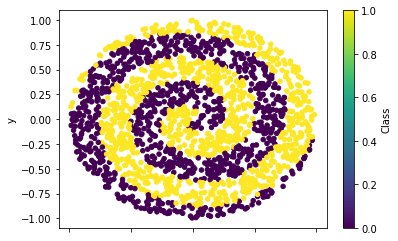

In [ ]:
# Genero un dataframe para el ítem c), con n = 2000 y lo grafico
n = 2000

df_c = item_c(n)
df_c.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis')

Como se puede observar, se genera el gráfico de espirales anidadas correctamente.